* There is a NGO having some amount of 100M dollar and they want to use this amount in those countries who needs it.
* A data below showing different recorded parameter from different countries.
* Identify the group of countries where NGO should spend the amount to help people

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/Country-data.xls')
df.head()

In [ ]:
#sns.pairplot(df)

In [ ]:
df['country'].nunique()

In [ ]:
df1=df.drop('country',axis='columns')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df1)
df_scaled=scaler.fit_transform(df1)
pd.DataFrame(df1)

In [ ]:
from sklearn.cluster import KMeans
losses=[]
for i in range (1,11):
    model=KMeans(n_clusters=i)
    model.fit(df_scaled)
    losses.append(model.inertia_)
print(losses)

In [ ]:
plt.plot(range(1,11),losses,marker='o')
plt.xlabel('Number Of Clusters')
plt.ylabel('loss')
plt.show()

In [1]:
model=KMeans(n_clusters=4)
model.fit(df_scaled)
df_clustered=pd.DataFrame(model.cluster_centers_,columns=df1.columns)
df_clustered.head()
model.cluster_centers_

NameError: name 'KMeans' is not defined

<Axes: >

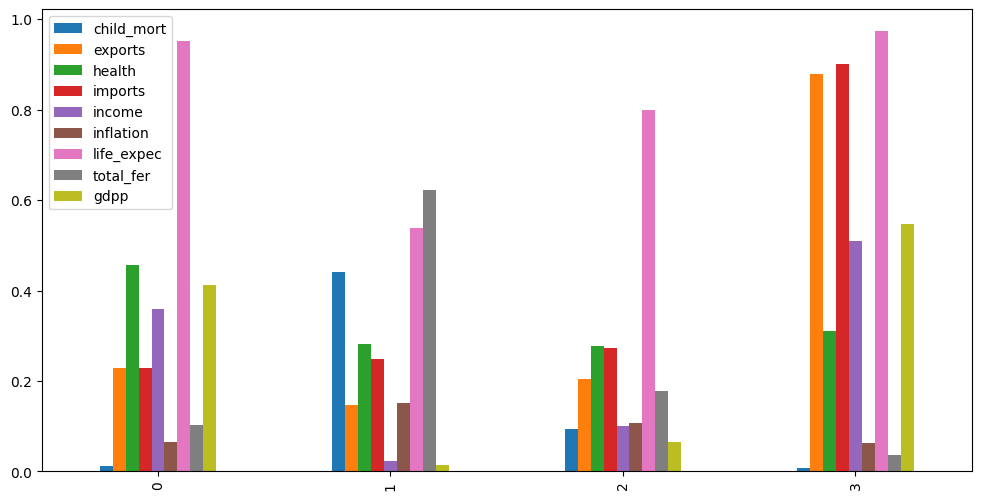

In [109]:
df_clustered.plot.bar(figsize=(12,6))

In [112]:
df1['clusters']=model.predict(df_scaled)
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [120]:
print("Country names where NGO should donate:\n",df[df1['clusters']==1]['country'].to_string(index=False))

Country names where NGO should donate:
              Afghanistan
                  Angola
                   Benin
            Burkina Faso
                 Burundi
                Cameroon
Central African Republic
                    Chad
                 Comoros
        Congo, Dem. Rep.
             Congo, Rep.
           Cote d'Ivoire
       Equatorial Guinea
                 Eritrea
                   Gabon
                  Gambia
                   Ghana
                  Guinea
           Guinea-Bissau
                   Haiti
                    Iraq
                   Kenya
                Kiribati
                     Lao
                 Lesotho
                 Liberia
              Madagascar
                  Malawi
                    Mali
              Mauritania
              Mozambique
                 Namibia
                   Niger
                 Nigeria
                Pakistan
                  Rwanda
                 Senegal
            Sierra Leone
         S